# Hybrid Sort
This project helps you familiarize with algorithm design through solving a famous design problem: 
general-purpose stable sort.

## Before you start
Before you start, enable extension manager and pair the notebook with a percent script through jupytext. 

1. [Enable extension manager](https://i.ibb.co/tP4vWk3/mng.png)
2. [Enable jupytext pairing](https://i.ibb.co/5LrtYcq/jupytext-enable.png)

In [12]:
# Execute this cell to enable testing. 
%pip install -q pytest pytest-cov

Note: you may need to restart the kernel to use updated packages.


## Task 3.1 Insertion + Merge + Hybrid

In [13]:
def insertion_sort_inplace(a, left, right):
    """
    Use insertion sort to sort a[left:right] inplace. Your implemntation should have
    O(right-left) time complexity and O(1) space complexity.
    """ 
        
    
    if len(a) > 1:
        for i in range(left + 1, right): 
            key = a[i] 
            j = i-1
            while j >= left and key < a[j] : 
                    a[j + 1] = a[j] 
                    j -= 1
            a[j + 1] = key  

def merge_inplace(a, left, mid, right):
    """
    With a[left:mid] and a[mid:right] sorted, merge them into one sorted array and
    then assign it to a[left:right]. This function uses O(right-left) time and
    O(right-left) space.
    """
    
    
    if len(a) > 1:
        temp_arr = []
        i, j= left, mid 
        
        while i < mid and j < right:
            if a[i] <= a[j]:
                temp_arr.append(a[i])
                i += 1
            else:
                temp_arr.append(a[j]) 
                j += 1

        if i < mid:
            temp_arr += a[i:mid]
        else:
            temp_arr += a[j:right]
        a[left:right] = temp_arr
    
def hybrid_sort_impl(a, left, right, thresh):
    """
    Helper function for hybrid_sort.  
    Performs a version of merge sort until right-left <= thresh, then switches to insertion sort.
    """
    # TODO: implement me
    
    
    if thresh <= 0:
        raise IndexError("Thresh should be positive.")
        
    if right - left <= thresh:
        insertion_sort_inplace(a, left, right)
        
    else: 
        mid = (right + left) // 2
        hybrid_sort_impl(a, left, mid, thresh)
        hybrid_sort_impl(a, mid, right, thresh)
        merge_inplace(a, left, mid, right)
    

def hybrid_sort(a, thresh=32):
    """
    performs an in-place stable sort of `a` using a divide and conquer approach
    similar to merge sort, except `thresh` determines when insertion sort will be applied.
    """
    hybrid_sort_impl(a, 0, len(a), thresh)

# Testing
1. Test your algorithm with black box and white box unittests. 
2. Use the command from the next cell to run coverage test and hit 100% coverage.  
3. Be sure to also check edge cases.

Additionally, use the provided `TaskInfo` class to test the stability of your algorithm. 


In [14]:
import pytest
import numpy as np


import functools
@functools.total_ordering
class TaskInfo:
    """
    `TaskInfo` consists of a priority and a name. When comparing two tasks, only priority is
    compared. The name is ignored. All comparison operators (<, >, <=, >=, ==, !=) have been
    defined for this class so you don't need to modify the sorting algorithm.

    ```
    assert TaskInfo(2, 'b') < TaskInfo(3, 'a')
    assert TaskInfo(4, 'b') == TaskInfo(4, 'b')
    ```

    When sorting a list of tasks, we want to put small priority tasks first. Among tasks with
    same priority, the original order in the input list should be preserved. This is a
    prioritized first-come-first-serve. Therefore, when sorting this array
        [TaskInfo(1, 'b'), TaskInfo(2, 'c'), TaskInfo(1, 'a')]
        sort ==>
        [TaskInfo(1, 'b'), TaskInfo(1, 'a'), TaskInfo(2, 'c')] <== correct!
        [TaskInfo(1, 'a'), TaskInfo(1, 'b'), TaskInfo(2, 'c')] <==  wrong!
    The second output is wrong because 'b' should come before 'a'.
    """

    def __init__(self, priority: int, name: str):
        self.priority = priority
        self.name = name

    def __lt__(self, other: 'TaskInfo'):
        return self.priority < other.priority

    def __eq__(self, other: 'TaskInfo'):
        return self.priority == other.priority
    

def test_stability_minimal():
    li = [TaskInfo(1, 'b'), TaskInfo(2, 'c'), TaskInfo(1, 'a')]
    hybrid_sort(li)
    assert li == [TaskInfo(1, 'b'), TaskInfo(1, 'a'), TaskInfo(2, 'c')]

def test_insertion():
    a0 = []
    insertion_sort_inplace(a0,0,1)
    assert(a0 == [])
    
    a2 = [5]
    insertion_sort_inplace(a2,0,1)
    assert(a2 == [5])
    
    a3 = [3,1,7,5,8,6]
    insertion_sort_inplace(a3, 0, 6)
    assert(a3 == [1,3,5,6,7,8])
    
    a4 = [3,1,7,5,8,6]
    insertion_sort_inplace(a4, 1, 4)
    assert(a4 == [3,1,5,7,8,6])
    
    a5 = [1,1,1]
    insertion_sort_inplace(a5, 0, 3)
    assert(a5 == [1,1,1])
    
    print("YEAH!!!! U passed insertion tests!!!")
    
    
def test_merge():
    
    # test merge_inplace
    m1 = [5,6,7,8,1,2,3]
    merge_inplace(m1,0,4,7)
    assert(m1 == [1, 2, 3, 5, 6, 7, 8])
    
    m2 = [1,7,8,2,3,4,6]
    merge_inplace(m2,0,3,7)
    assert(m2 == [1, 2, 3, 4, 6, 7, 8])
    
    m3 = [1,3,4,5,6,2]
    merge_inplace(m3,0,5,6)
    assert(m3 == [1, 2, 3, 4, 5, 6])
    
        
    m5 = []
    merge_inplace(m5,0,5,6)
    assert(m5 == [])
    
    m6 = [1]
    merge_inplace(m6,0,5,6)
    assert(m6 == [1])
    
    m7 = [1,1,1]
    merge_inplace(m7,0,1,3)
    assert(m7 == [1,1,1])
    
    print("YEAH!!!! U passed merge tests!!!")
    
def test_hybrid():
    # test hybrid_sort
    
    m1 = []
    hybrid_sort(m1, 2)
    assert(m1 == [])
    
    m2 = [1]
    hybrid_sort(m2, 2)
    assert(m2 == [1])
    
    m3 = [1,1,1]
    hybrid_sort(m3, 2)
    assert(m3 == [1,1,1])
    
    m4 = [1,7,8,2]
    hybrid_sort(m4, 2)
    assert(m4 == [1, 2, 7, 8])
    
    m5 = [1,3,2,4,5,6,7]
    hybrid_sort(m5, 6)
    assert(m5 == [1,2,3,4,5,6,7])
    
    m6 = [1,3,2,4,5,7,6]
    hybrid_sort(m6, 2)
    assert(m6 == [1,2,3,4,5,6,7])
    
    m7 = [1,3,2,4,5,7,6]
    with pytest.raises(IndexError):
        hybrid_sort(m7, -2)
    
    print("YEAH!!!! U passed hybrid tests!!!")
    
    
test_insertion()
test_merge()
test_hybrid()

YEAH!!!! U passed insertion tests!!!
YEAH!!!! U passed merge tests!!!
YEAH!!!! U passed hybrid tests!!!


In [15]:
# execute this cell to start the test. 
# Note that pytest only works on `.py` files. So jupytext pairing is necessary.
!pytest --cov-report term --cov-report=annotate HybridSort.py --cov .

/opt/conda/lib/python3.7/site-packages/dash/testing/plugin.py:17: UserWarning:

run `pip install dash[testing]` if you need dash.testing

============================= test session starts ==============================
platform linux -- Python 3.7.3, pytest-5.2.1, py-1.8.0, pluggy-0.13.0
rootdir: /home/jovyan/DATA1050/hw03-hybrid-sort-tongxinw
plugins: cov-2.8.1, dash-1.3.0
collected 4 items                                                              

HybridSort.py ....                                                       [100%]

----------- coverage: platform linux, python 3.7.3-final-0 -----------
Name            Stmts   Miss  Cover
-----------------------------------
HybridSort.py     109      0   100%
Coverage annotated source written next to source


============================== 4 passed in 0.34s ===============================


In [16]:
## Lines begining with '!' is not covered by your tests
!grep --color=always -C 4 -E "^!.*$" "HybridSort.py,cover"

## Task 3.2 Finding the Best Threshold

[0.035078776860000216, 0.033112776659999954, 0.03005931234000016, 0.02989435664000027, 0.029188980019999918, 0.028287625660000017, 0.02948763592000006, 0.034843550879999935, 0.04884599197999989]
The threshold which minimizes the average run time is 16


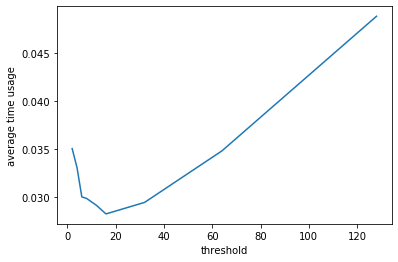

In [11]:
%matplotlib inline
import time
import numpy as np
from matplotlib import pyplot as plt


def get_random_list(): # pragma: no cover
    """
    return a random list of 10000 `int`s.
    """
    return np.random.randint(np.iinfo(np.int).min, np.iinfo(np.int).max, 10_000).tolist()

def find_threshold(): # pragma: no cover
    """
    Find the best threshold to use for `hybrid_sort`.
    """
    n_samples = 50
    np.random.seed(0)
    # you need to sort each of these 20 lists
    unsorted = [get_random_list() for _ in range(n_samples)]
    # thresholds to experiment
    thresholds = [2, 4, 6, 8, 12, 16, 32, 64, 128]

    # TODO: Now let's choose the best threshold through a simple performance test. Instead of
    # just trying each threshold on one single array, we will take the average on a few runs to
    # minimize randomness. There are 50 unsorted lists in `unsorted`. Calculate the average
    # execution time to sort each of them.
    #
    # Complete the function to output the best threshold you have found and produce a plot of
    # execution time against choice of threshold. Report what you find and explain.
    #
    # TIP: !IMPORTANT!
    # `hybrid_sort` sorts a list in-place. However, you need to keep the unsorted lists intact 
    # for the next round.
    avg_time = []
    for th in thresholds:
        th_time = []
        for l in unsorted:
            a = l[:]
            t1 = time.process_time()
            hybrid_sort(a, th)
            t2 = time.process_time()
            th_time.append(t2-t1)
        avg_time.append(np.mean(th_time))
        
    print(avg_time)
    print("The threshold which minimizes the average run time is",thresholds[np.argmin(avg_time)])
    
    plt.plot(thresholds,avg_time)
    plt.xlabel('threshold')
    plt.ylabel('average time usage')
    
    plt.savefig("dim.png", dpi = 300)
    
    plt.show()
    
if __name__ == '__main__': # pragma: no cover
    find_threshold()